In [1]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the CSV data
data = pd.read_csv('excel/results_with_env.csv')
data.head()


# Define the predictors and the target variable
predictors = ["NOU", "N", "FJ", "M", "EG", "NU", "K", "O", "all", "T", "P", "FG", "C", "FP", "H", "MU", "F", "G", "E",
              "S", "Q", "L", "GM", "B", "KO", "J", "D"]
target = "GC"

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.2, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Lasso model
lasso = LassoCV(cv=5, random_state=0).fit(X_train_scaled, y_train)
# Get the coefficients of the model
coefficients = pd.DataFrame({"Feature": predictors, "Coefficient": lasso.coef_})

# Filter out the features with zero coefficient (not important for the model)
important_features = coefficients[coefficients["Coefficient"] != 0]

# Display the important features
important_features


,Feature,Coefficient
0,NOU,0.032424
2,FJ,1.392696
4,EG,0.715292
5,NU,1.007443
6,K,0.082008
8,all,-0.222030
9,T,0.217240
10,P,-1.214878
12,C,-2.640884
13,FP,0.539064


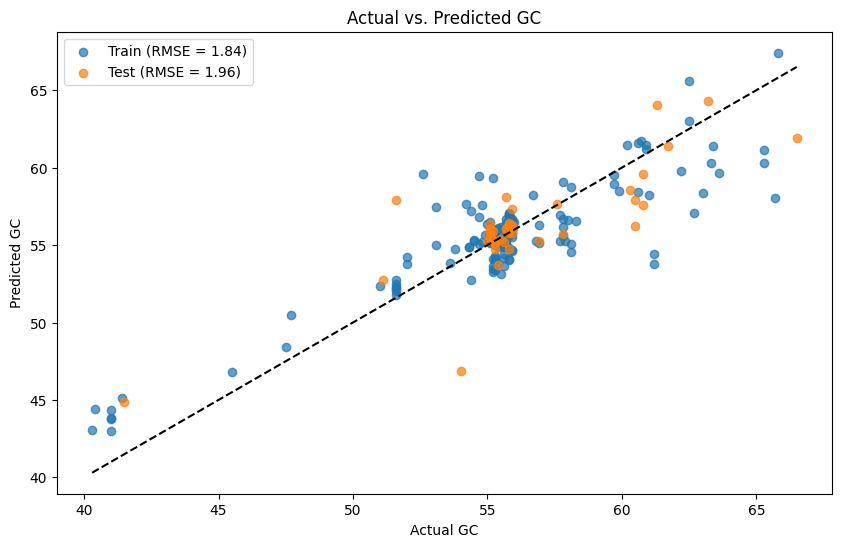

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Use the model to make predictions
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

# Calculate the root mean squared error for the training and testing sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create a scatter plot of the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label='Train (RMSE = {:.2f})'.format(rmse_train), alpha=0.7)
plt.scatter(y_test, y_test_pred, label='Test (RMSE = {:.2f})'.format(rmse_test), alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 'k--')
plt.xlabel('Actual GC')
plt.ylabel('Predicted GC')
plt.title('Actual vs. Predicted GC')
plt.legend()
plt.show()


In [3]:
from sklearn.metrics import r2_score

# Calculate the R^2 score for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

r2_train, r2_test


(0.7788979185014238, 0.6682726201025133)

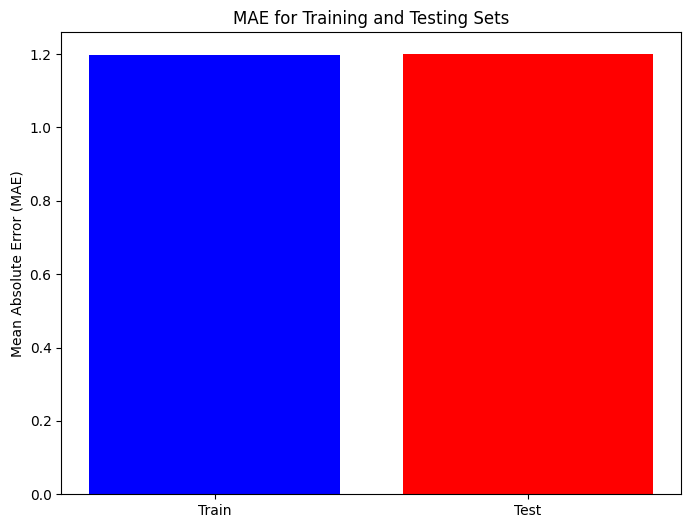

(1.1976395444572494, 1.1996286157423168)

In [4]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE) for the training and testing sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Create a bar plot for MAE
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [mae_train, mae_test], color=['blue', 'red'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Training and Testing Sets')
plt.show()

mae_train, mae_test


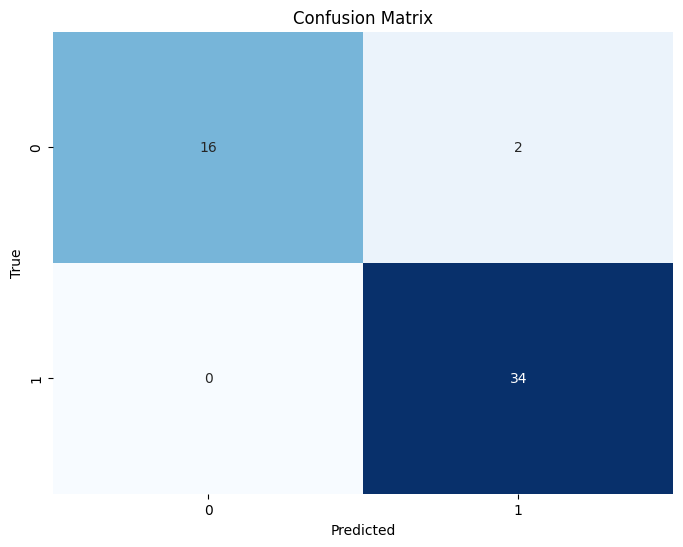

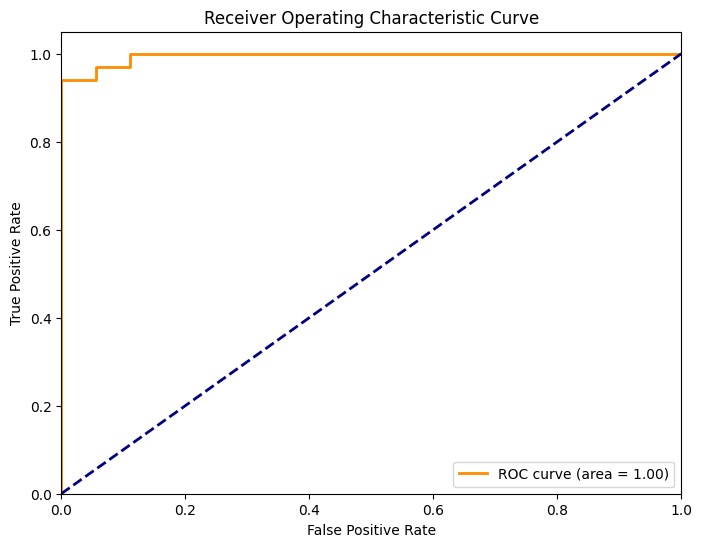

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import pandas as pd

# Load the data
data = pd.read_csv('excel/results_with_env.csv')

# Show the first few rows
data.head()
# Preprocess the data
data['group2'] = data['group2'].apply(lambda x: 1 if x == 'homo' else 0)

# Show the first few rows
data.head()


# Split the data into features and target
X = data.drop(columns=['sample', 'group1', 'group2'])
y = data['group2']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy, report
from sklearn.metrics import roc_curve, auc

# Compute the probabilities of the positive class
y_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


c:\Users\DuYih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DuYih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DuYih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

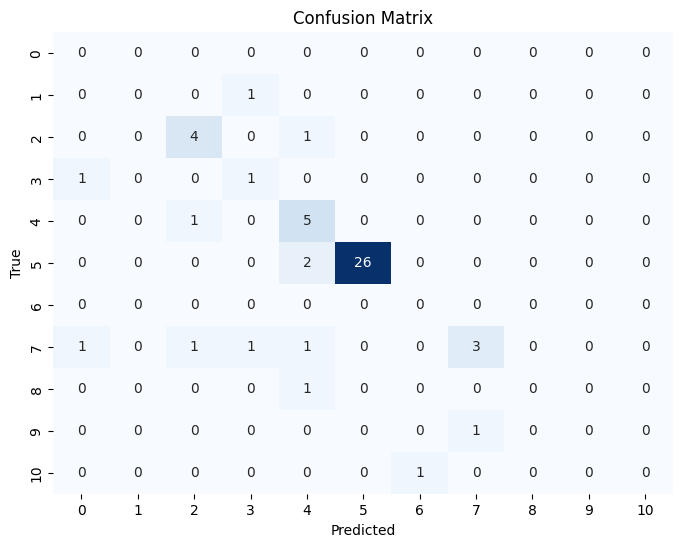

(0.75,
 '              precision    recall  f1-score   support\n\n   Chlorella       0.00      0.00      0.00         0\n  Rhizoplane       0.00      0.00      0.00         1\n       feces       0.67      0.80      0.73         5\n  freshwater       0.33      0.50      0.40         2\n         gut       0.50      0.83      0.62         6\n        host       1.00      0.93      0.96        28\n  hot spring       0.00      0.00      0.00         0\n         non       0.75      0.43      0.55         7\n    seawater       0.00      0.00      0.00         1\n    sediment       0.00      0.00      0.00         1\n     volcano       0.00      0.00      0.00         1\n\n    accuracy                           0.75        52\n   macro avg       0.30      0.32      0.30        52\nweighted avg       0.77      0.75      0.75        52\n')

In [6]:
# Split the data into features and target
X = data.drop(columns=['sample', 'group2', 'group1'])
y = data['group1']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy, report


C:\Users\DuYih\AppData\Local\Temp\ipykernel_17324\2988958085.py:9: UserWarning: 
The palette list has fewer values (2) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['red', 'blue'])


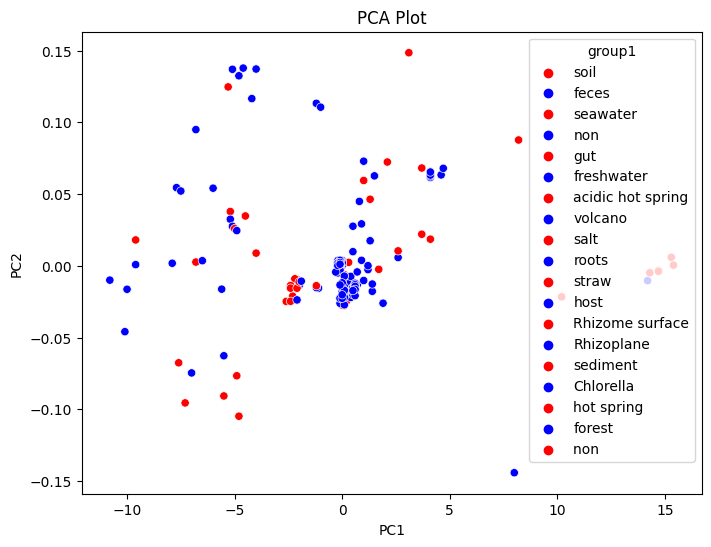

C:\Users\DuYih\AppData\Local\Temp\ipykernel_17324\2988958085.py:22: UserWarning: 
The palette list has fewer values (2) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=['red', 'blue'])


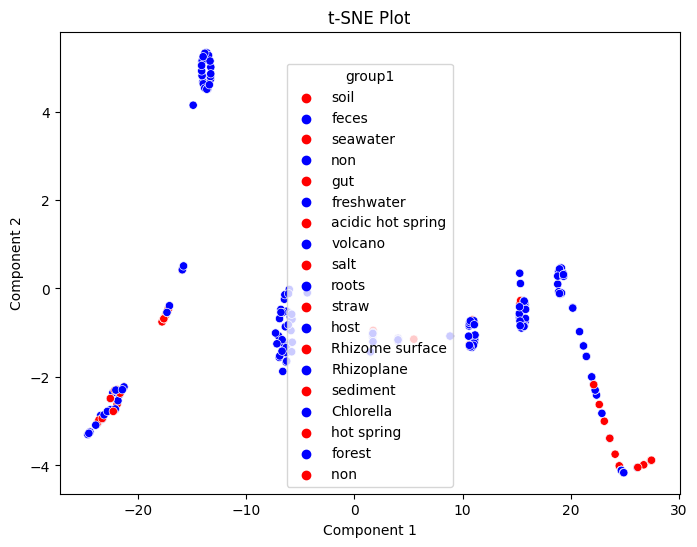

In [7]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['red', 'blue'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the first two components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=['red', 'blue'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Plot')
plt.show()


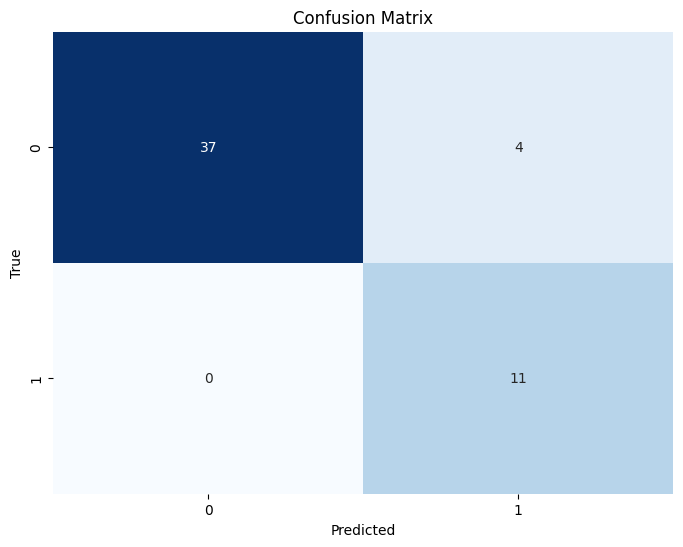

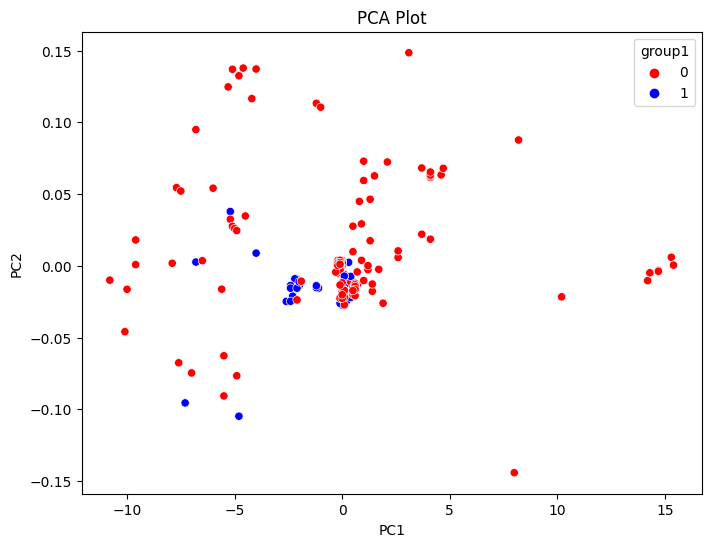

In [8]:
# Reload the data
data = pd.read_csv('excel/results_with_env.csv')

# Preprocess the 'group1' column
data['group1'] = data['group1'].apply(lambda x: 1 if x in ['gut', 'feces'] else 0)

# Show the first few rows
data.head()
# Split the data into features and target
X = data.drop(columns=['sample', 'group2', 'group1'])
y = data['group1']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy, report
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['red', 'blue'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()



# The machine to divide the environment and host Ver.


In [9]:
import pandas as pd

# Load the data
data = pd.read_csv('excel/results_with_env.csv')

# Display the first few rows of the data
data.head()
# Check the unique categories and their counts in the 'group1' column
data['group1'].value_counts()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Combine the categories of interest into one category and the rest into another
data['group1'] = data['group1'].apply(lambda x: x if x in ['host', 'gut', 'feces', 'non'] else 'other')

# Separate the features (X) and the target variable (y)
X = data.drop(columns=['sample', 'group1', 'group2'])
y = data['group1']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate the classifier
clf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Print the classification report
classification_report(y_test, y_pred, output_dict=True)


{'feces': {'precision': 1.0,
  'recall': 0.8,
  'f1-score': 0.888888888888889,
  'support': 5},
 'gut': {'precision': 0.7142857142857143,
  'recall': 0.5555555555555556,
  'f1-score': 0.6250000000000001,
  'support': 9},
 'host': {'precision': 0.8,
  'recall': 0.96,
  'f1-score': 0.8727272727272728,
  'support': 25},
 'non': {'precision': 1.0,
  'recall': 0.4,
  'f1-score': 0.5714285714285715,
  'support': 5},
 'other': {'precision': 0.8888888888888888,
  'recall': 1.0,
  'f1-score': 0.9411764705882353,
  'support': 8},
 'accuracy': 0.8269230769230769,
 'macro avg': {'precision': 0.8806349206349207,
  'recall': 0.7431111111111111,
  'f1-score': 0.7798442407265938,
  'support': 52},
 'weighted avg': {'precision': 0.8373015873015874,
  'recall': 0.8269230769230769,
  'f1-score': 0.8129650170091348,
  'support': 52}}

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Compute the ROC AUC score for each class
roc_auc_score(y_test_bin, y_pred_bin, average='macro')


0.8424094432699084

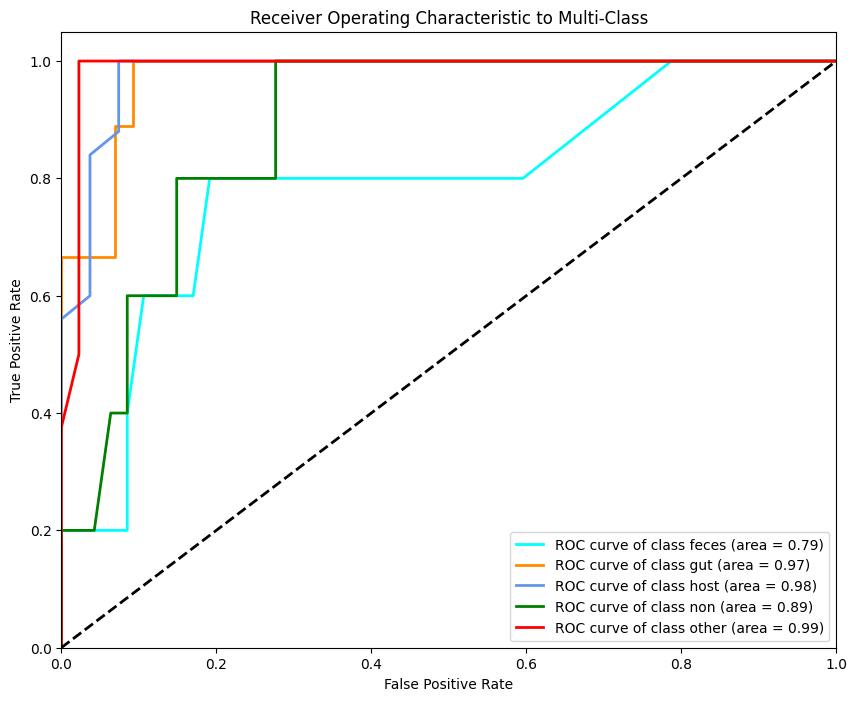

In [11]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y = label_binarize(data['group1'], classes=['feces', 'gut', 'host', 'non', 'other'])
n_classes = y.shape[1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(['feces', 'gut', 'host', 'non', 'other'][i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()


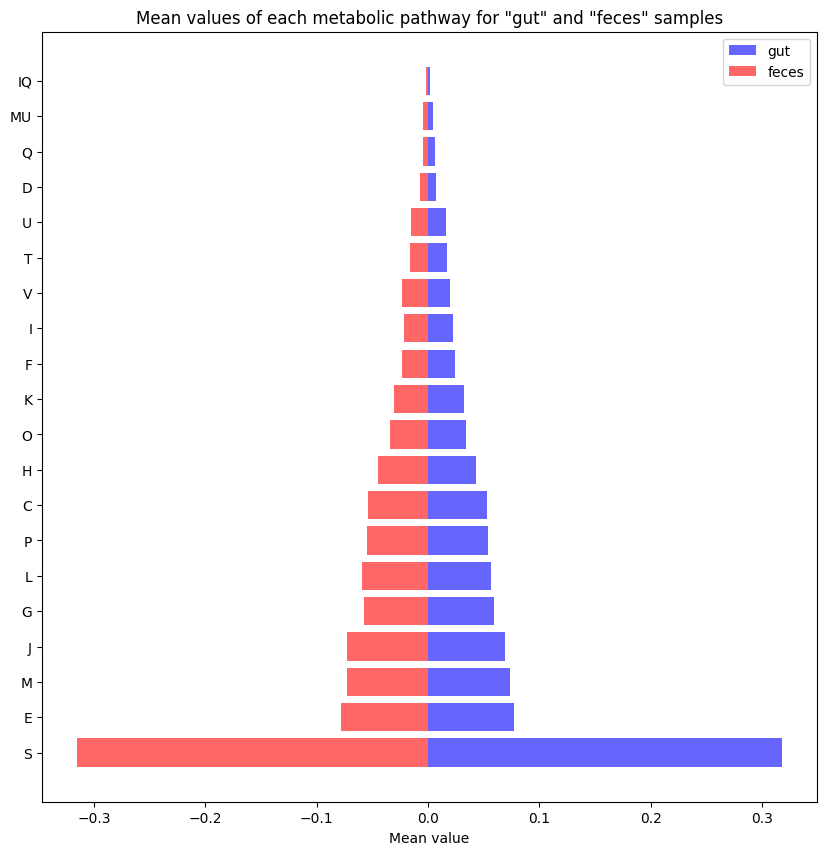

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Filter the data to keep only 'gut' and 'feces' samples
data_filtered = data[data['group1'].isin(['gut', 'feces'])]

# Separate the features (X) and the target variable (y)
X = data_filtered.drop(columns=['sample', 'group1', 'group2'])
y = data_filtered['group1']

# Remove the 'GC' column from the features
X = X.drop(columns=['GC'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Print the classification report
classification_report(y_test, y_pred, output_dict=True)

# Calculate the mean for each metabolic pathway for 'gut' and 'feces' samples
means_gut = data_filtered[data_filtered['group1'] == 'gut'].drop(columns=['sample', 'group1', 'group2', 'GC']).mean()
means_feces = data_filtered[data_filtered['group1'] == 'feces'].drop(columns=['sample', 'group1', 'group2', 'GC']).mean()

# Combine the means into a DataFrame for easier manipulation
df_means = pd.DataFrame({'gut': means_gut, 'feces': means_feces})

# Sort the DataFrame by the sum of the means
df_means = df_means.assign(mean_sum = df_means.sum(axis=1))
df_means = df_means.sort_values(by='mean_sum', ascending=False)

# Keep only the top 20 metabolic pathways
df_means = df_means.head(20)

# Plot the means
plt.figure(figsize=(10, 10))
plt.barh(df_means.index, df_means['gut'], alpha=0.6, color='blue', label='gut')
plt.barh(df_means.index, -df_means['feces'], alpha=0.6, color='red', label='feces')
plt.legend()
plt.xlabel('Mean value')
plt.title('Mean values of each metabolic pathway for "gut" and "feces" samples')
plt.show()



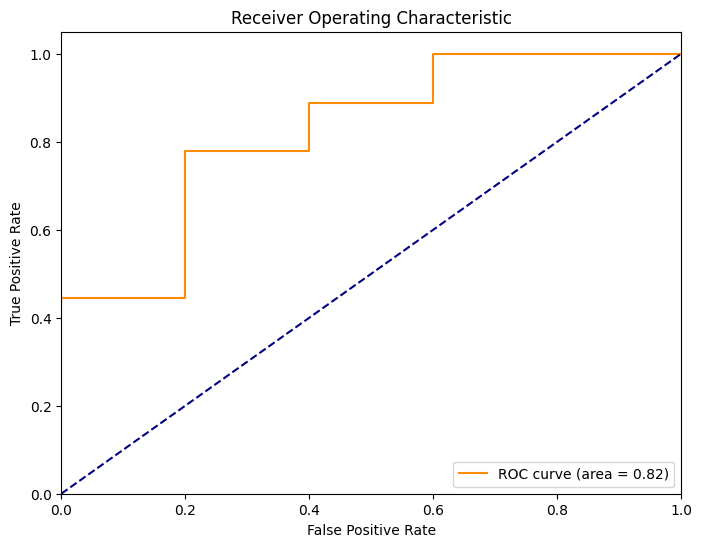

In [13]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and ROC area
y_test_bin = LabelBinarizer().fit_transform(y_test)  # Binarize the labels
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test_bin, y_score[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


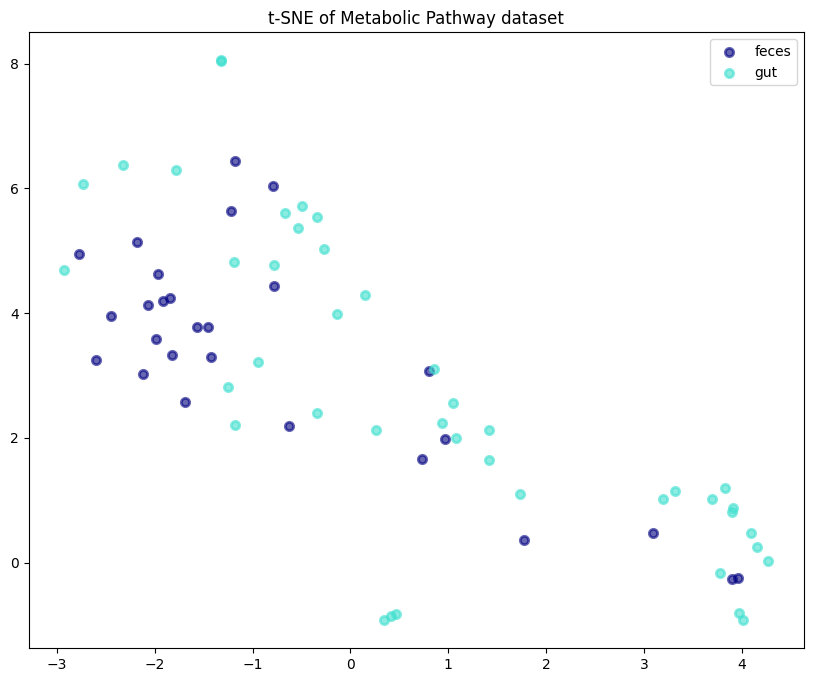

In [14]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
for color, i, target_name in zip(['navy', 'turquoise'], ['feces', 'gut'], ['feces', 'gut']):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, alpha=0.6, lw=2, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE of Metabolic Pathway dataset')
plt.show()


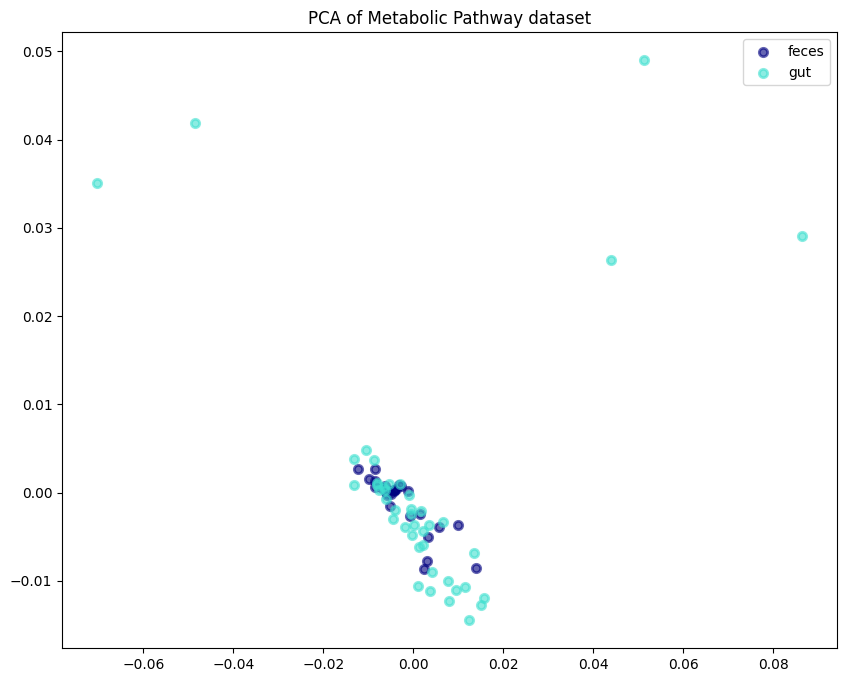

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Re-load the data
data = pd.read_csv('excel/results_with_env.csv')  # replace 'YOUR_FILE_PATH' with the actual path to your file

# Filter the data to keep only 'gut' and 'feces' samples
data_filtered = data[data['group1'].isin(['gut', 'feces'])]

# Separate the features (X) and the target variable (y)
X = data_filtered.drop(columns=['sample', 'group1', 'group2', 'GC'])
y = data_filtered['group1']

# Convert all non-numeric values in X to NaN and fill them with 0
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(10, 8))
for color, i, target_name in zip(['navy', 'turquoise'], ['feces', 'gut'], ['feces', 'gut']):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.6, lw=2, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Metabolic Pathway dataset')
plt.show()
